In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

In [ ]:
from scipy.io import loadmat
df = loadmat('hepatitis_dataset.mat')
X=df['norm_data']
y=df['target']
X.shape

(155, 19)

In [ ]:
# prompt: give the names of the features along with the datas

feature_names = ['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

print(data.head())


        AGE  SEX   STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  LIVER_BIG  \
0  0.323944  1.0  0.000000         1.0      1.0      1.0       1.0        0.0   
1  0.605634  0.0  0.000000         1.0      0.0      1.0       1.0        0.0   
2  1.000000  0.0  1.000000         1.0      0.0      1.0       1.0        1.0   
3  0.338028  0.0  0.496774         0.0      1.0      1.0       1.0        1.0   
4  0.380282  0.0  1.000000         1.0      1.0      1.0       1.0        1.0   

   LIVER_FIRM  SPLEEN_PALPABLE  SPIDERS  ASCITES  VARICES  BILIRUBIN  \
0         1.0              1.0      1.0      1.0      1.0   0.090909   
1         1.0              1.0      1.0      1.0      1.0   0.077922   
2         1.0              1.0      1.0      1.0      1.0   0.051948   
3         1.0              1.0      1.0      1.0      1.0   0.051948   
4         1.0              1.0      1.0      1.0      1.0   0.090909   

   ALK_PHOSPHATE      SGOT   ALBUMIN   PROTIME  HISTOLOGY  target  
0       0.21

In [ ]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,target
0,0.323944,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.219331,0.006309,0.441860,0.351161,0.0,0
1,0.605634,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.077922,0.405204,0.044164,0.325581,0.351161,0.0,0
2,1.000000,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.260223,0.028391,0.441860,0.351161,0.0,0
3,0.338028,0.0,0.496774,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.074349,0.059937,0.441860,0.800000,0.0,0
4,0.380282,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.221633,0.293375,0.441860,0.351161,0.0,0


In [ ]:
data.shape

(155, 20)

In [ ]:
data.info

<bound method DataFrame.info of           AGE  SEX   STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
0    0.323944  1.0  0.000000         1.0      1.0      1.0       1.0   
1    0.605634  0.0  0.000000         1.0      0.0      1.0       1.0   
2    1.000000  0.0  1.000000         1.0      0.0      1.0       1.0   
3    0.338028  0.0  0.496774         0.0      1.0      1.0       1.0   
4    0.380282  0.0  1.000000         1.0      1.0      1.0       1.0   
..        ...  ...       ...         ...      ...      ...       ...   
150  0.549296  0.0  1.000000         1.0      0.0      0.0       0.0   
151  0.521127  0.0  1.000000         1.0      0.0      1.0       1.0   
152  0.760563  0.0  0.000000         1.0      0.0      0.0       1.0   
153  0.647887  1.0  0.000000         1.0      0.0      1.0       1.0   
154  0.507042  0.0  1.000000         1.0      0.0      1.0       1.0   

     LIVER_BIG  LIVER_FIRM  SPLEEN_PALPABLE  SPIDERS  ASCITES  VARICES  \
0          0.0         1.0              1.0      1.0      1.0      1.0   
1          0.0         1.0              1.0      1.0      1.0      1.0   
2          1.0         1.0              1.0      1.0      1.0      1.0   
3          1.0         1.0              1.0      1.0      1.0      1.0   
4          1.0         1.0              1.0      1.0      1.0      1.0   
..         ...         ...              ...      ...      ...      ...   
150        1.0         1.0              1.0      0.0      0.0      0.0   
151        1.0         0.0              1.0      1.0      1.0      1.0   
152        0.0         0.0              1.0      0.0      1.0      1.0   
153        1.0         1.0              0.0      0.0      1.0      0.0   
154        1.0         1.0              0.0      0.0      0.0      1.0   

     BILIRUBIN  ALK_PHOSPHATE      SGOT   ALBUMIN   PROTIME  HISTOLOGY  target  
0     0.090909       0.219331  0.006309  0.441860  0.351161        0.0       0  
1     0.077922       0.405204  0.044164  0.325581  0.351161        0.0       0  
2     0.051948       0.260223  0.028391  0.441860  0.351161        0.0       0  
3     0.051948       0.074349  0.059937  0.441860  0.800000        0.0       0  
4     0.090909       0.221633  0.293375  0.441860  0.351161        0.0       0  
..         ...            ...       ...       ...       ...        ...     ...  
150   0.948052       0.221633  0.359621  0.279070  0.500000        1.0       1  
151   0.077922       0.371747  0.201893  0.511628  0.351161        1.0       1  
152   0.064935       0.182156  0.009464  0.465116  0.351161        1.0       1  
153   0.155844       0.204461  0.007886  0.465116  0.480000        1.0       1  
154   0.116883       0.275093  0.007886  0.232558  0.420000        1.0       1  

[155 rows x 20 columns]>

In [ ]:
data.describe()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,target
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.481690,0.103226,0.506431,0.845161,0.350593,0.603829,0.792133,0.819979,0.575359,0.798127,0.658273,0.864724,0.878044,0.146153,0.281184,0.113307,0.389905,0.502954,0.451613,0.451613
std,0.176984,0.305240,0.499958,0.362923,0.477174,0.489087,0.405728,0.367686,0.477609,0.394905,0.467613,0.335661,0.320894,0.154331,0.174876,0.139558,0.146132,0.217297,0.499266,0.499266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352113,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.064935,0.193309,0.029180,0.307727,0.351161,0.000000,0.000000
50%,0.450704,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.090909,0.221633,0.070978,0.418605,0.351161,0.000000,0.000000
75%,0.605634,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.155844,0.347584,0.134069,0.488372,0.650000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: title={'center': 'Count of Hepatitis disease'}, xlabel='target'>

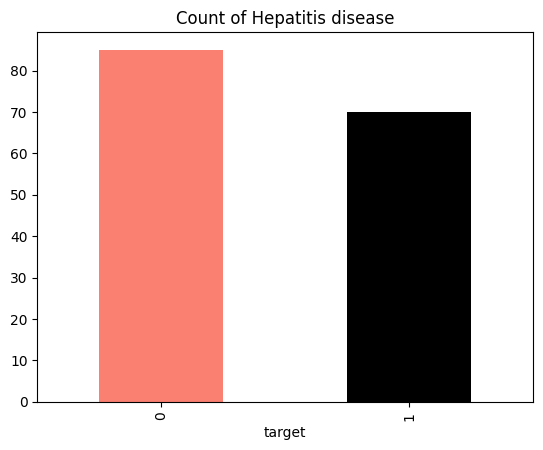

In [ ]:
data['target'].value_counts().plot(kind='bar',color=['salmon','black'],title="Count of Hepatitis disease")

<Axes: ylabel='Frequency'>

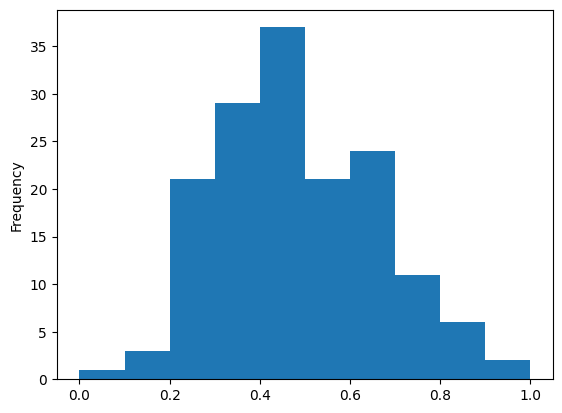

In [ ]:
data['AGE'].plot(kind='hist')

By the above histogram we can say that the most patients within the age group
above 35yrs are diagnosed with Hepatitis disease.

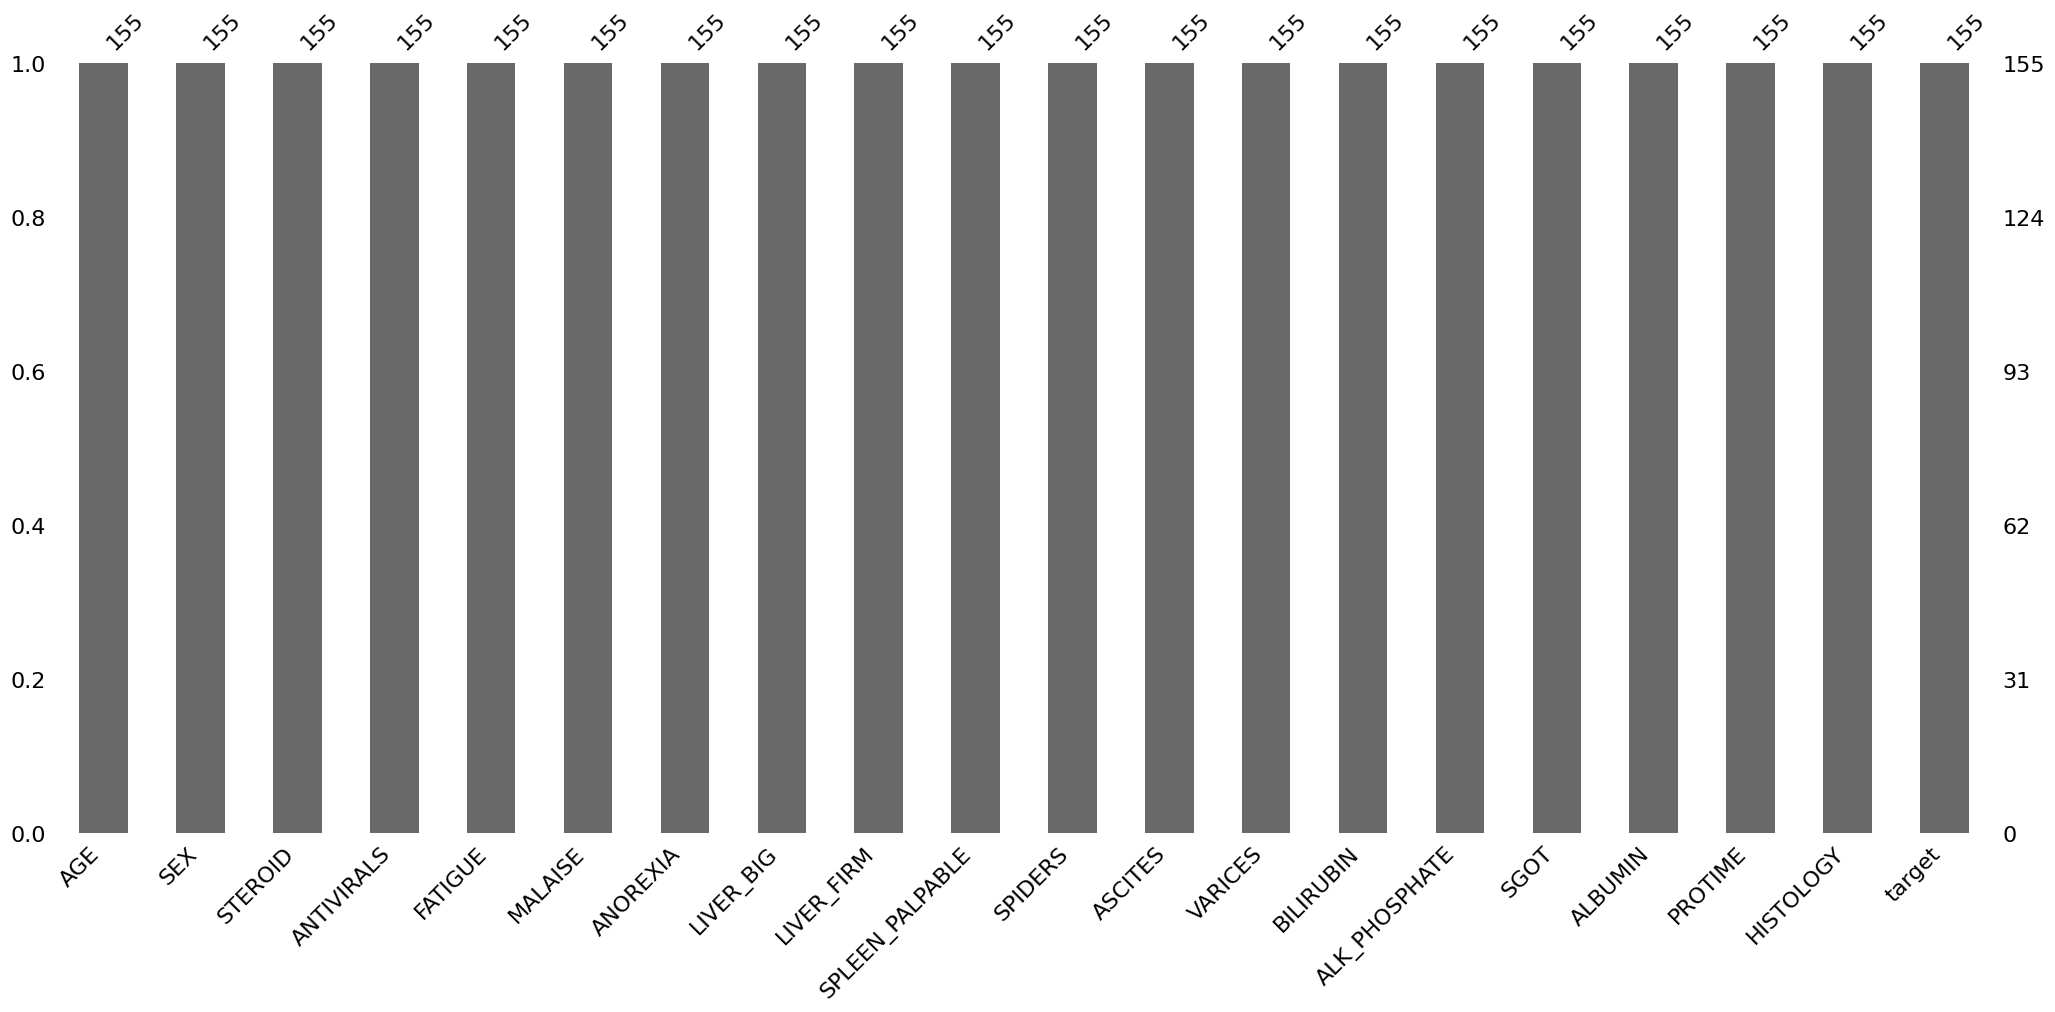

In [ ]:
import missingno as msno
p = msno.bar(data)

This represent that there is no mising values in any of the columns

<ipython-input-12-b908fa5e9614>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(data['AGE'])


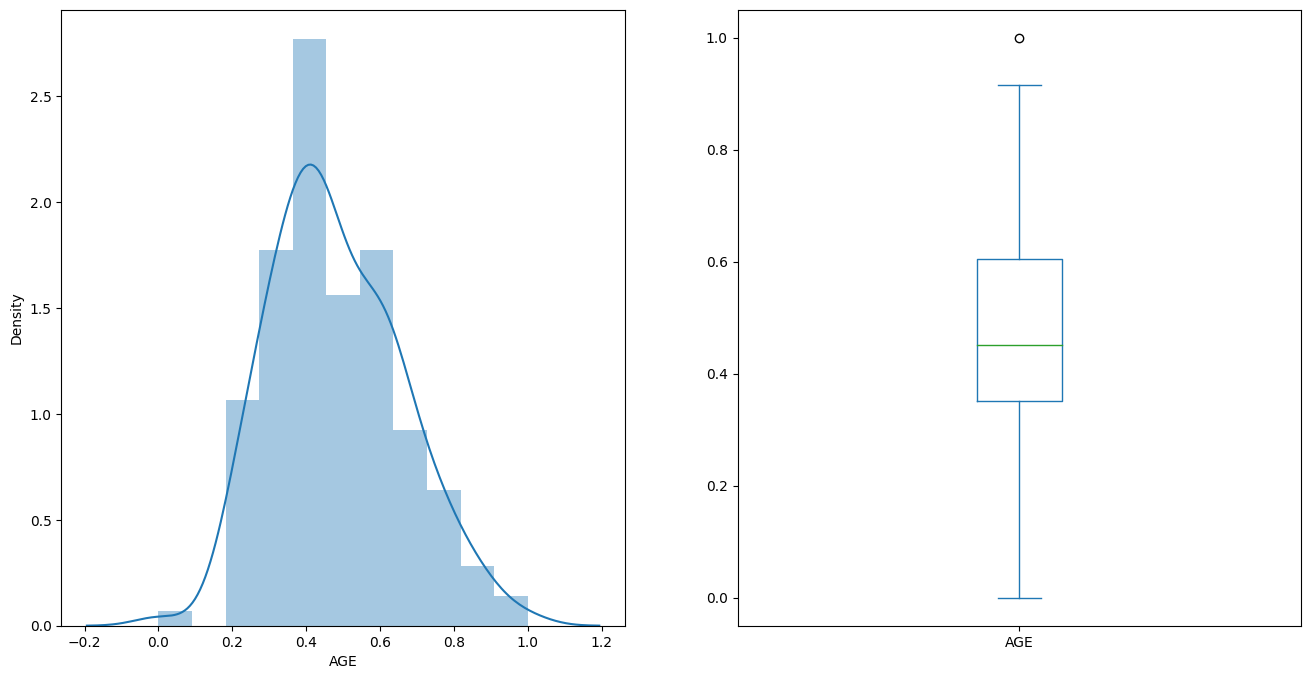

In [ ]:
plt.subplot(121), sns.distplot(data['AGE'])
plt.subplot(122), data['AGE'].plot.box(figsize=(16,8))
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    float64
 1   SEX              155 non-null    float64
 2   STEROID          155 non-null    float64
 3   ANTIVIRALS       155 non-null    float64
 4   FATIGUE          155 non-null    float64
 5   MALAISE          155 non-null    float64
 6   ANOREXIA         155 non-null    float64
 7   LIVER_BIG        155 non-null    float64
 8   LIVER_FIRM       155 non-null    float64
 9   SPLEEN_PALPABLE  155 non-null    float64
 10  SPIDERS          155 non-null    float64
 11  ASCITES          155 non-null    float64
 12  VARICES          155 non-null    float64
 13  BILIRUBIN        155 non-null    float64
 14  ALK_PHOSPHATE    155 non-null    float64
 15  SGOT             155 non-null    float64
 16  ALBUMIN          155 non-null    float64
 17  PROTIME         

<ipython-input-14-9398f8397f8f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(data['target'])


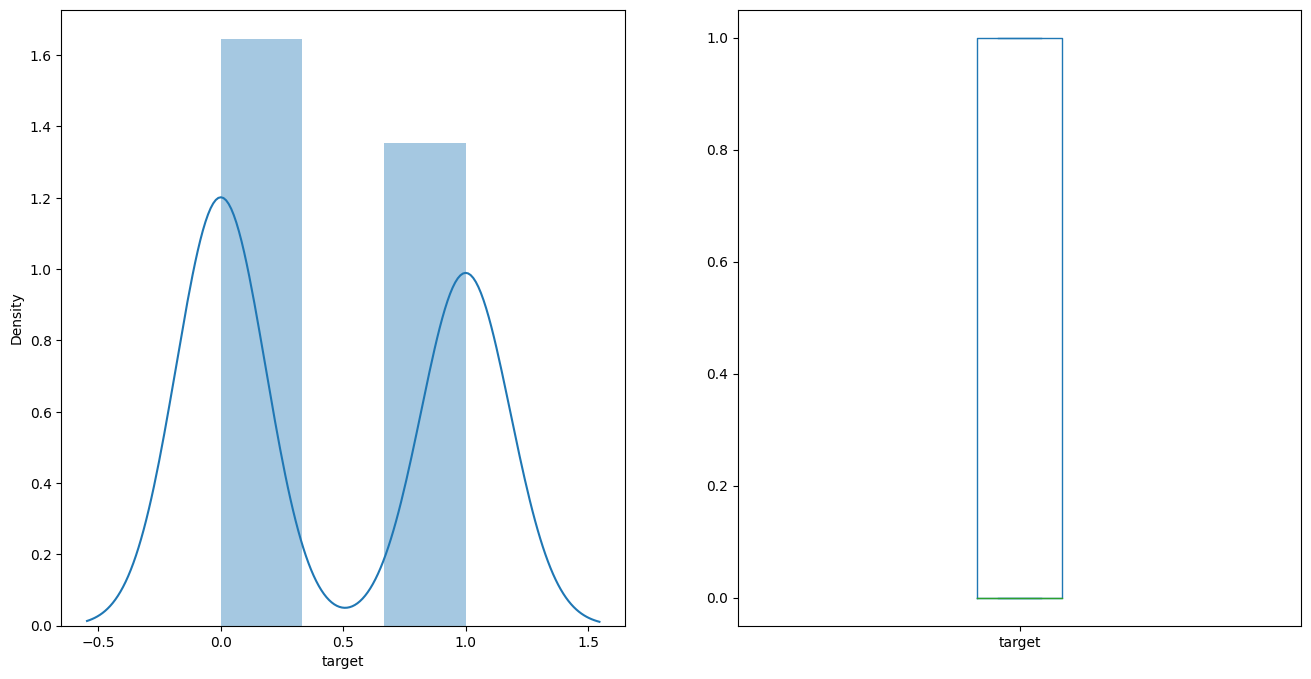

In [ ]:
plt.subplot(121), sns.distplot(data['target'])
plt.subplot(122), data['target'].plot.box(figsize=(16,8))
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    float64
 1   SEX              155 non-null    float64
 2   STEROID          155 non-null    float64
 3   ANTIVIRALS       155 non-null    float64
 4   FATIGUE          155 non-null    float64
 5   MALAISE          155 non-null    float64
 6   ANOREXIA         155 non-null    float64
 7   LIVER_BIG        155 non-null    float64
 8   LIVER_FIRM       155 non-null    float64
 9   SPLEEN_PALPABLE  155 non-null    float64
 10  SPIDERS          155 non-null    float64
 11  ASCITES          155 non-null    float64
 12  VARICES          155 non-null    float64
 13  BILIRUBIN        155 non-null    float64
 14  ALK_PHOSPHATE    155 non-null    float64
 15  SGOT             155 non-null    float64
 16  ALBUMIN          155 non-null    float64
 17  PROTIME         

<Axes: >

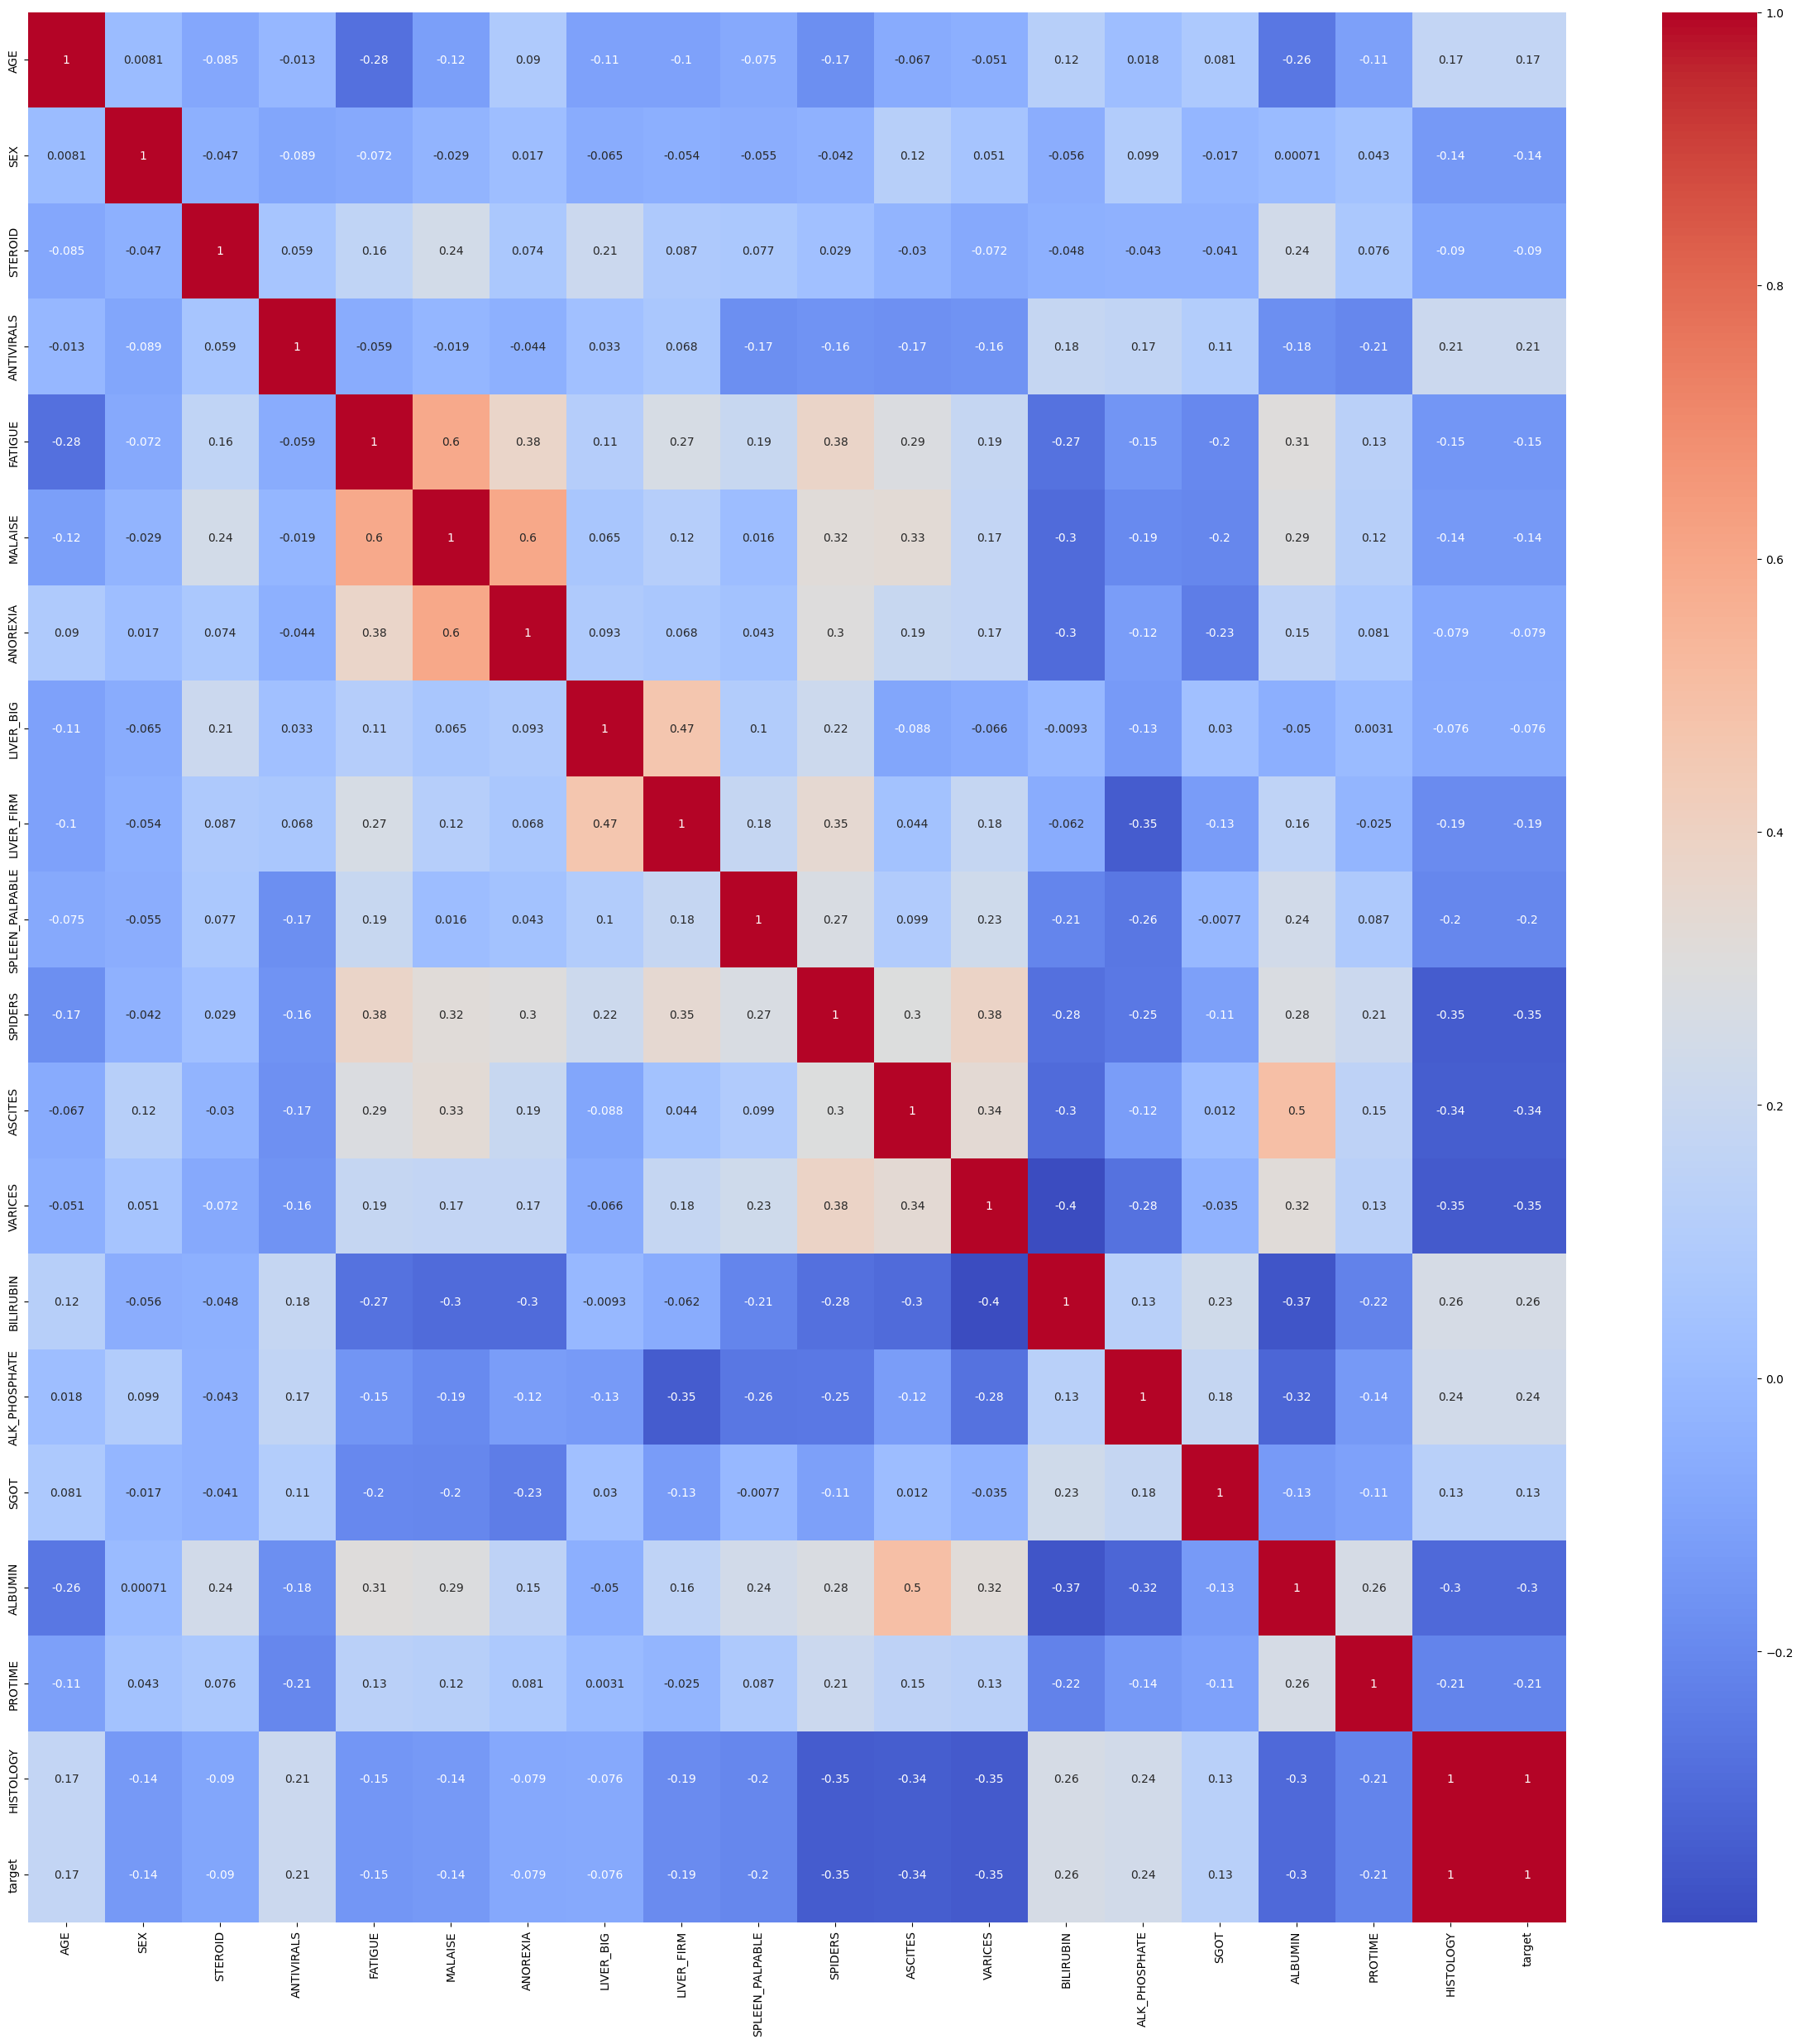

In [ ]:
plt.figure(figsize = (30,30))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row

In [ ]:
data.shape

(155, 20)

In [ ]:
data.columns

Index(['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME',
       'HISTOLOGY', 'target'],
      dtype='object')

In [ ]:
data.isna().sum()

AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
target             0
dtype: int64

In [ ]:
corr_matrix = data.corr();
sorted_corr = corr_matrix['target'].sort_values(ascending = False)
sorted_corr

target             1.000000
HISTOLOGY          1.000000
BILIRUBIN          0.257945
ALK_PHOSPHATE      0.236174
ANTIVIRALS         0.209242
AGE                0.170780
SGOT               0.129811
LIVER_BIG         -0.075715
ANOREXIA          -0.078516
STEROID           -0.089754
SEX               -0.137450
MALAISE           -0.140091
FATIGUE           -0.151043
LIVER_FIRM        -0.190032
SPLEEN_PALPABLE   -0.201790
PROTIME           -0.213055
ALBUMIN           -0.300099
ASCITES           -0.338045
SPIDERS           -0.346912
VARICES           -0.350337
Name: target, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X = data.iloc[:,:-2]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True, random_state = 42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Create GridSearchCV object for logistic regression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
print(best_params_lr)

log_model = LogisticRegression(C=best_params_lr['C'], penalty=best_params_lr['penalty'])
log_model.fit(X_train,y_train)

{'C': 0.1, 'penalty': 'l2'}


LogisticRegression(C=0.1)

In [ ]:
print("training accuracy: ", log_model.score(X_train,y_train))
print("test accuracy : ", log_model.score(X_test, y_test))

training accuracy:  0.7068965517241379
test accuracy :  0.6923076923076923


In [ ]:
pd.DataFrame(log_model.coef_, columns=X.columns)

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME
0,0.094843,-0.212047,-0.128416,0.196451,-0.056528,-0.083853,0.015772,-0.024697,-0.267656,-0.274764,-0.378164,-0.337962,-0.378814,0.131164,0.211971,0.023668,-0.14558,-0.178627


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    This function will be helping in plotting the confusion matrix by using seaborn
    """

    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    tn,fp,fn,tp = confusion_matrix(y_test,y_preds).ravel()
    specificity = tn/(tn+fp)
    print("Specificity : ",specificity)
    sensitivity = tp/(tp+fn)
    print("Sensitivity :" , sensitivity)
    fpr = 1 - specificity
    print("False Positive Rate :", fpr)


log_pred = log_model.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,log_pred))

Accuracy :  0.6923076923076923


In [ ]:
import imblearn


In [ ]:

from imblearn.metrics import geometric_mean_score

# Assuming y_test and log_pred are arrays or lists
score = geometric_mean_score(y_test, log_pred)

training accuracy:  0.7068965517241379
test accuracy :  0.6923076923076923
precision score:  0.75
recall score:  0.5
f1 score :  0.6
Geometric mean :  0.6546536707079771
Specificity :  0.8571428571428571
Sensitivity : 0.5
False Positive Rate : 0.1428571428571429


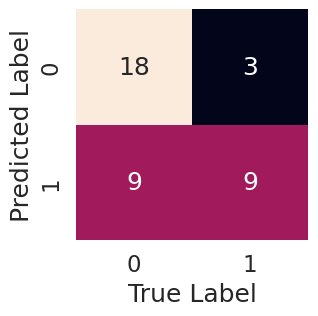

In [ ]:
print("training accuracy: ", log_model.score(X_train,y_train))
print("test accuracy : ", log_model.score(X_test, y_test))
print("precision score: ", metrics.precision_score(y_test, log_pred))
print("recall score: ", metrics.recall_score(y_test,log_pred))
print("f1 score : ",metrics.f1_score(y_test, log_pred))
print("Geometric mean : ",imblearn.metrics.geometric_mean_score(y_test,log_pred))
plot_conf_mat(y_test, log_pred)

training accuracy:  1.0
test accuracy :  0.6923076923076923
precision score:  0.6666666666666666
recall score:  0.6666666666666666
f1 score :  0.6666666666666666
Geometric mean :  0.6900655593423543
Specificity :  0.7142857142857143
Sensitivity : 0.6666666666666666
False Positive Rate : 0.2857142857142857


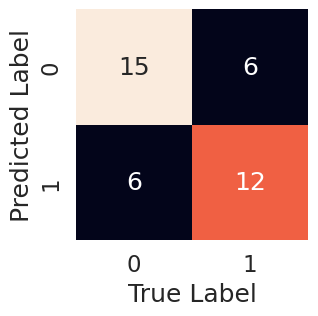

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_model = DecisionTreeClassifier()
dec_model.fit(X_train,y_train)
dec_pred = dec_model.predict(X_test)


print("training accuracy: ", dec_model.score(X_train,y_train))
print("test accuracy : ", dec_model.score(X_test, y_test))
print("precision score: ", metrics.precision_score(y_test, dec_pred))
print("recall score: ", metrics.recall_score(y_test,dec_pred))
print("f1 score : ",metrics.f1_score(y_test, dec_pred))
print("Geometric mean : ",imblearn.metrics.geometric_mean_score(y_test,dec_pred))
plot_conf_mat(y_test, dec_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


rf_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("training accuracy: ", rf_model.score(X_train,y_train))
print("test accuracy : ", rf_model.score(X_test, y_test))
print("precision score: ", metrics.precision_score(y_test, rf_pred))
print("recall score: ", metrics.recall_score(y_test,rf_pred))
print("f1 score : ",metrics.f1_score(y_test, rf_pred))
print("Geometric mean : ",imblearn.metrics.geometric_mean_score(y_test,rf_pred))
plot_conf_mat(y_test, rf_pred)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import timeit
from sklearn.neural_network import MLPClassifier
from sklearn import svm


In [ ]:
kf = KFold(n_splits = 10)
kf.get_n_splits(X)
print(kf)
iter = 1
for train, test in kf.split(X):

    print("Fold:%d" % (iter))

    model = svm.SVC(kernel='rbf', gamma=0.5, C=1e+6)

    start_time = timeit.default_timer()
    model.fit(X_train, y_train)
    end_time = timeit.default_timer()
    exec_time=end_time-start_time
    #calculate training accuracy
    y_train_pred=model.predict(X_train)
    y_pred=model.predict(X_test)
    #for i in range(y_pred.shape[0]):
            #print(y_pred[i])
    print("training accuracy: ", rf_model.score(X_train,y_train))
    print("test accuracy : ", rf_model.score(X_test, y_test))
    print("precision score: ", metrics.precision_score(y_test, rf_pred))
    print("recall score: ", metrics.recall_score(y_test,rf_pred))
    print("f1 score : ",metrics.f1_score(y_test, rf_pred))
    print("Geometric mean : ",imblearn.metrics.geometric_mean_score(y_test,rf_pred))
    plot_conf_mat(y_test, rf_pred)
    iter=iter+1

print("Classification using SVM is completed.")


In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    float64
 1   SEX              155 non-null    float64
 2   STEROID          155 non-null    float64
 3   ANTIVIRALS       155 non-null    float64
 4   FATIGUE          155 non-null    float64
 5   MALAISE          155 non-null    float64
 6   ANOREXIA         155 non-null    float64
 7   LIVER_BIG        155 non-null    float64
 8   LIVER_FIRM       155 non-null    float64
 9   SPLEEN_PALPABLE  155 non-null    float64
 10  SPIDERS          155 non-null    float64
 11  ASCITES          155 non-null    float64
 12  VARICES          155 non-null    float64
 13  BILIRUBIN        155 non-null    float64
 14  ALK_PHOSPHATE    155 non-null    float64
 15  SGOT             155 non-null    float64
 16  ALBUMIN          155 non-null    float64
 17  PROTIME         

In [ ]:
#This function takes input features x and returns the predicted probabilities of class 1 (churn) using log_model.predict_proba(x)[:,1].
def model_churn_proba(x):
 return log_model.predict_proba(x)[:,1]

# Provide Log Odds as Output
def model_churn_log_odds(x):
 p = log_model.predict_log_proba(x)
 return p[:,1] - p[:,0]
# compute the SHAP values for the linear model
background_churn = shap.maskers.Independent(X, max_samples=2000)                         #SHAP's maskers module is used to create a background dataset for explaining the model.
explainer = shap.Explainer(log_model, background_churn,feature_names=list(X.columns))    #The "Explainer" class will compute the shapley values and explain the output.
shap_values_churn = explainer(X)                                                         #The SHAP Explainer object is called.
shap_values = pd.DataFrame(shap_values_churn.values)                                     #Converting the obtained Shapley values into a dataframe.
shap_values.columns = list(X.columns)                                                    #Assigning columns to our Shapley values dataframe.#Assigning columns to our Shapley values dataframe.

#COMPUTING SHAP VALUESFOR LINEAR MODEL
explainer_log_odds = shap.Explainer(log_model, background_churn,feature_names=list(X.columns))     #Doing same steps as above for the logarithmic probabilities.
shap_values_churn_log_odds = explainer_log_odds(X)
shap_values_churn_log_odds

#SHAP values have three objects: (a) the SHAP value for each feature,(b) the base value, and (c) the original training data.
#SHAP values provide insight into the contribution of each feature to the model's output for individual instances in the dataset.
#Positive SHAP values indicate a positive contribution to the prediction, while negative values indicate a negative contribution.
# The magnitude represents the strength of the impact.


.values =
array([[-0.01496114, -0.1901585 ,  0.06503365, ..., -0.00253246,
        -0.00756369,  0.02711414],
       [ 0.01175518,  0.02188875,  0.06503365, ..., -0.0016365 ,
         0.00936421,  0.02711414],
       [ 0.04915804,  0.02188875, -0.06338202, ..., -0.00200982,
        -0.00756369,  0.02711414],
       ...,
       [ 0.02644916,  0.02188875,  0.06503365, ..., -0.0024578 ,
        -0.01094927,  0.02711414],
       [ 0.01576263, -0.1901585 ,  0.06503365, ..., -0.00249513,
        -0.01094927,  0.00410012],
       [ 0.00240447,  0.02188875, -0.06338202, ..., -0.00249513,
         0.02290654,  0.01481771]])

.base_values =
array([-0.22257745, -0.22257745, -0.22257745, -0.22257745, -0.22257745,
       -0.22257745, -0.22257745, -0.22257745, -0.22257745, -0.22257745,
       -0.22257745, -0.22257745, -0.22257745, -0.22257745, -0.22257745,
       -0.22257745, -0.22257745, -0.22257745, -0.22257745, -0.22257745,
       -0.22257745, -0.22257745, -0.22257745, -0.22257745, -0.22257745,
 

In [ ]:
X.columns

Index(['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME'],
      dtype='object')

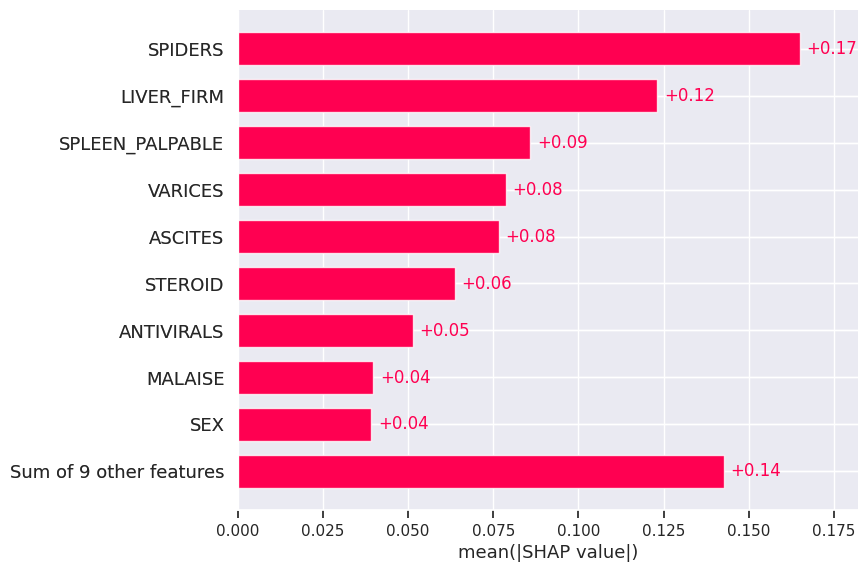

In [ ]:
shap.plots.bar(shap_values_churn_log_odds)
#Generates a bar plot showing the average magnitude of the Shapley values for each feature across all instances in the dataset.
# Higher the values of higher is the contribution in the model's prediction(+ve values)

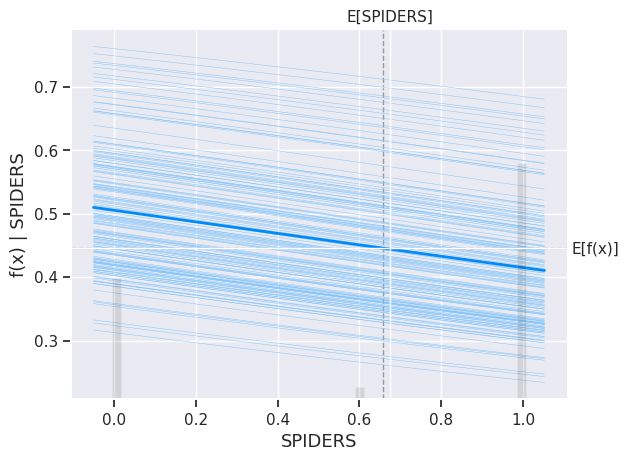

In [ ]:
fig,ax = shap.partial_dependence_plot("SPIDERS",model_churn_proba,X,model_expected_value = True,feature_expected_value = True,show = False,ice = True)

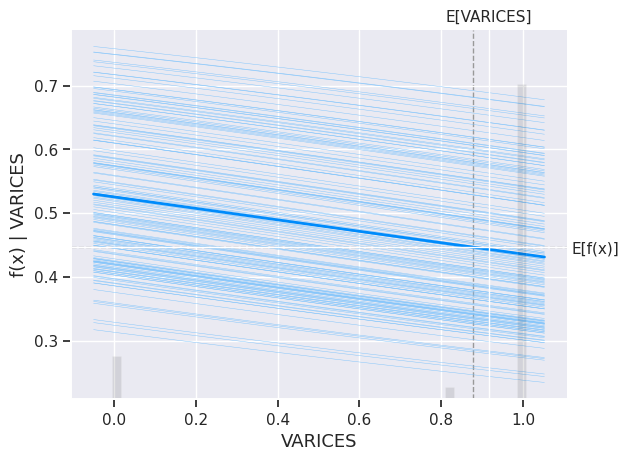

In [ ]:
fig,ax = shap.partial_dependence_plot("VARICES",model_churn_proba,X,model_expected_value = True,feature_expected_value = True,show = False,ice = True)

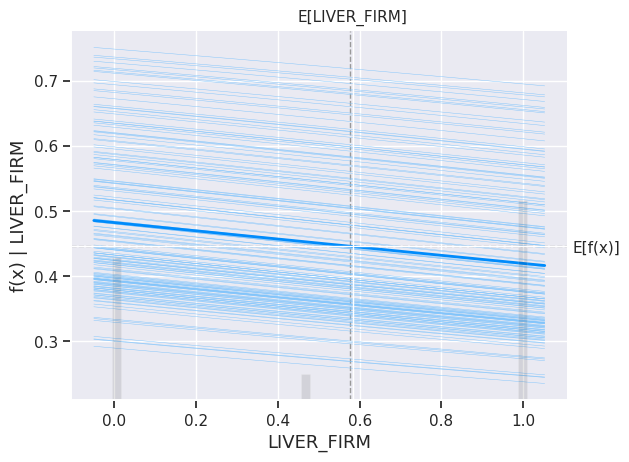

In [ ]:
fig,ax = shap.partial_dependence_plot("LIVER_FIRM",model_churn_proba,X,model_expected_value = True,feature_expected_value = True,show = False,ice = True)

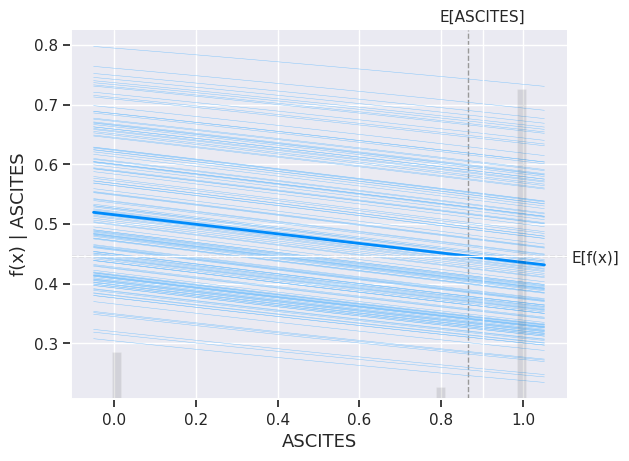

In [ ]:
fig,ax = shap.partial_dependence_plot("ASCITES",model_churn_proba,X,model_expected_value = True,feature_expected_value = True,show = False,ice = True)

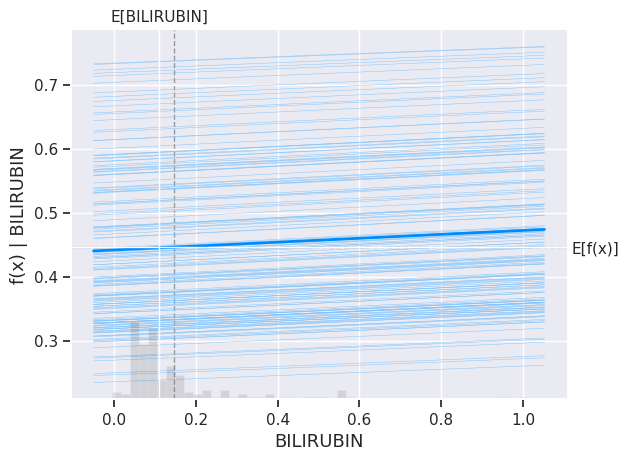

In [ ]:
fig,ax = shap.partial_dependence_plot("BILIRUBIN",model_churn_proba,X,model_expected_value = True,feature_expected_value = True,show = False,ice = True)

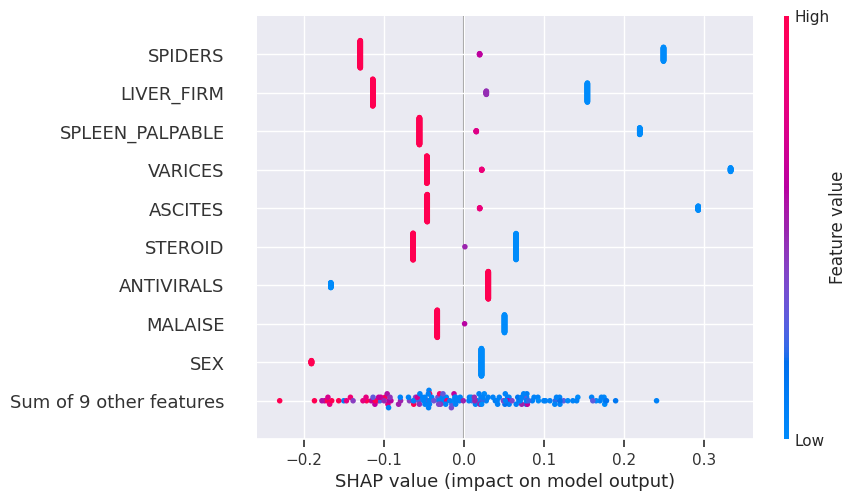

In [ ]:
shap.plots.beeswarm(shap_values_churn_log_odds)

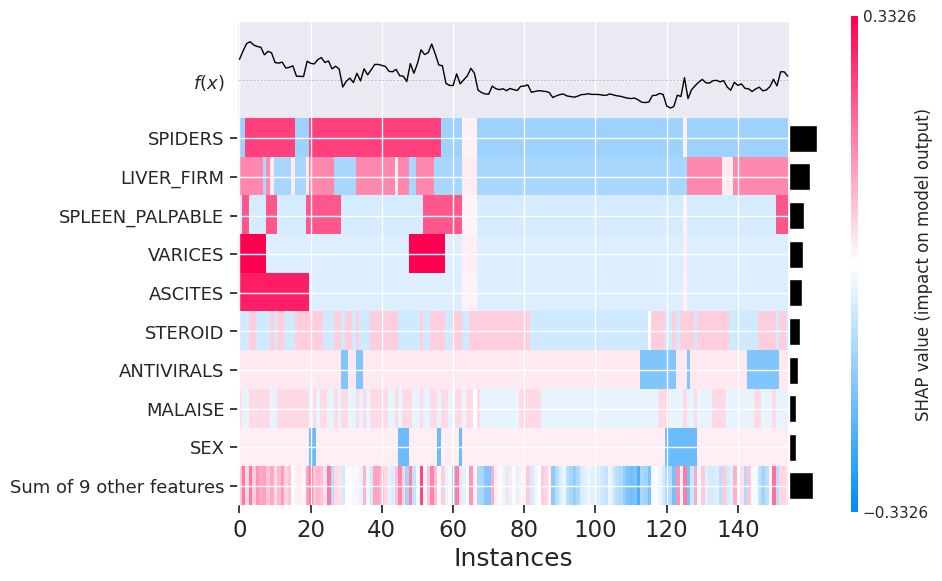

In [ ]:
shap.plots.heatmap(shap_values_churn_log_odds[:1000])

**compute the SHAP values for the linear model**

#SHAP value calculation

In [ ]:
explainer = shap.Explainer(log_model.predict, X)

In [ ]:
shap_values=explainer(X)

In [ ]:
feature_names = X_test.columns
feature_names

In [ ]:
explainer = shap.KernelExplainer(log_model.predict_proba, X_test)
shap_values = explainer.shap_values(X_test)

# Provide correct feature_names
feature_names = X_test.columns
shap_values = explainer.shap_values(X_test)[:, :, 1]
shap.force_plot(explainer.expected_value[1], shap_values[0], X_test.iloc[0], feature_names=feature_names)

# Use shap.force_plot with correct parameters
# Assuming you want to explain the prediction for class 1 (replace 1 with 0 if needed)


#Force Plot


 It visually represents the impact of each feature on the model's prediction for a specific instance.

In [ ]:
import shap
shap.initjs()

In [ ]:
import shap
from IPython.display import display, Javascript

# Initialize JavaScript (initjs)
shap.initjs()

# Assume you have already defined explainer, shap_values, X_test, and feature_names

# Generate force plot and save to HTML
shap.force_plot(explainer.expected_value[1], shap_values[0], X_test.iloc[0], feature_names=feature_names)


#Interpretation

*   The value 0.66 represents the model's predicted probability for the positive class (or whatever the class of interest is). In binary classification tasks, where there are two classes (often labeled as 0 and 1, or negative and positive), this value represents the probability assigned by the model to the positive class.
*   Base value: The base value represents the model's average prediction for the entire dataset


*   If we're predicting whether a person is having Hepatitis or not, a predicted probability of 0.66 for the positive class would mean that the model believes there's an 66% chance that the the person is having the Disease.

#Explanation result using LIME

In [ ]:
pip install lime

In [ ]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(np.
array(X_train),
feature_names=list(X_train.columns),
class_names=['target_churn_dum'],
verbose=True, mode='classification')
exp = explainer.explain_instance(X_test.iloc[0], log_model.predict_proba, num_features=16)
exp.as_list()

In [ ]:
pd.DataFrame(exp.as_list())

In [ ]:
exp.show_in_notebook(show_table=True)

Row 0 (SPIDERS): If the value of the feature "SPIDERS" is less than or equal to 0.00, it contributes a weight of 0.085070 to the final prediction.

Row 1 (LIVER_FIRM): If the value of the feature "LIVER_FIRM" falls within the range of 0.00 to 1.00, it contributes a weight of -0.054249 to the final prediction.

Row 2 (SEX): If the value of the feature "SEX" is less than or equal to 0.00 (possibly indicating male), it contributes a weight of 0.052794 to the final prediction.